# 2 双指针

## 2.1 移动零

请注意 ，必须在不复制数组的情况下原地对数组进行操作。  
输入: nums = [0,1,0,3,12]  
输出: [1,3,12,0,0]

In [ ]:
# 两个指针，一个快指针遍历数组，一个慢指针记录非零元素位置，遇到非零元素就交换
class Solution:
    def moveZeroes(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        slow = 0
        for fast in range(len(nums)):
            if nums[fast]!=0:
                nums[slow],nums[fast]=nums[fast],nums[slow]
                slow+=1

## 2.2  盛最多水的容器

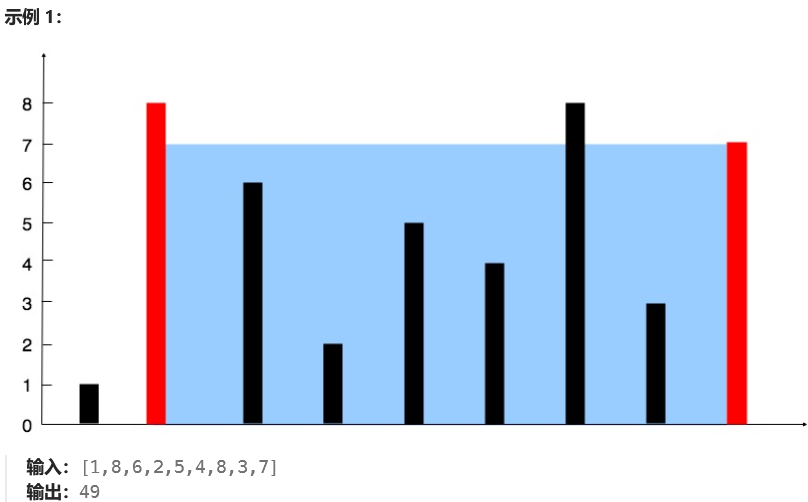

In [ ]:
# 两个指针，一个指向开头一个指向结尾，计算面积，移动较短边指针
class Solution:
    def maxArea(self, height: List[int]) -> int:
        left,right = 0,len(height)-1
        max_area = 0
        while left<right:
            current_width = right-left
            current_height = min(height[left],height[right])
            current_area = current_width*current_height
            max_area = max(max_area,current_area)
            # 移动较短边指针
            if height[left]<height[right]:
                left+=1
            else:
                right-=1
        return max_area

## 2.3 三数之和

注意：答案中不可以包含重复的三元组  
输入：nums = [-1,0,1,2,-1,-4]  
输出：[[-1,-1,2],[-1,0,1]]

In [ ]:
# 三数之和为0，排序+双指针
def threeSum(nums: list[int]) -> list[list[int]]:
    res = []
    n = len(nums)
    if n < 3:  # 边界条件：元素不足3个，直接返回空
        return res
    nums.sort()
    for i in range(n):
        if i > 0 and nums[i] == nums[i-1]:
            continue
        if nums[i] > 0:
            break
        
        # 双指针初始化：左指针在i+1，右指针在数组末尾
        left = i + 1
        right = n - 1
        target = -nums[i]  # 另外两数之和需等于-target
        while left < right:
            current_sum = nums[left] + nums[right]
            if current_sum == target:
                res.append([nums[i], nums[left], nums[right]])
                while left < right and nums[left] == nums[left+1]:
                    left += 1
                while left < right and nums[right] == nums[right-1]:
                    right -= 1
                left += 1
                right -= 1
                
            elif current_sum < target:
                left += 1
            else:
                right -= 1
    return res

## 2.4 接雨水

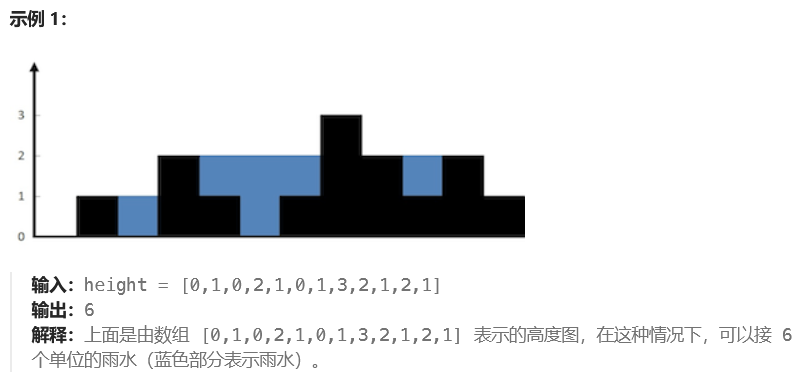

In [ ]:
# 本质上是对单一柱子接水量的累加，双指针从两端向中间收缩，维护左右两侧最大高度
class Solution:
    def trap(self, height: List[int]) -> int:
        if not height:
            return 0
        left = 0 
        right = len(height) - 1 
        left_max = 0
        right_max = 0
        res = 0
        
        while left < right:
            # 核心：接水量由「短板」决定
            if height[left] < height[right]:
                # 左指针位置的高度 ≥ 左侧最大高度 → 更新最大高度（无法接水）
                if height[left] >= left_max:
                    left_max = height[left]
                # 否则 → 该位置可接水，量为 left_max - 当前高度
                else:
                    res += left_max - height[left]
                left += 1 
            else:
                # 右指针位置的高度 ≥ 右侧最大高度 → 更新最大高度（无法接水）
                if height[right] >= right_max:
                    right_max = height[right]
                # 否则 → 该位置可接水，量为 right_max - 当前高度
                else:
                    res += right_max - height[right]
                right -= 1
        return res